# Analysis, detection & mitigation of felonious wallet accounts over the Ethereum Blockchain network using Machine Learning techniques

| BITS ID No. | Name of Student    | Email                          | Mobile     |
| ------------| ------------------ | ------------------------------ | ---------- |
| 2019HC04178 | Anjali Sunder Naik | sundernaik.anjali@in.bosch.com | 8147757114 |

# 1. Problem Statement

As of 2021, a survey from Coin Market Cap indicates that there are nearly over 6,000 digital coins in the market, a severe increase from just a handful since 2013. However, a large portion of these cryptocurrencies might not be that significant. The total market cap of all the crypto assets, including stable coins and tokens has shown a significant rise from year 2020 and has hit 2.4 trillion. Cryptocurrencies has vast potential of revolutionizing and transforming compliance-free peer-to-peer transactions. However, an end user must overcome certain challenges related to privacy, security, and control. As the transactions are recorded in a publicly distributed ledger known as blockchain, hackers have a large attack surface to gain access to critical and sensitive data. In the rapidly growing crypto currency space, the technological advent of cryptocurrencies and their respective benefits has been veiled with several illicit financing activities operating over the network such as ransomware, terrorist financing, hacking, data manipulation during transaction process, phishing, fraud, money laundering, bribery etc. Chainalysis, a firm that tracks every crypto currency transaction and serves as an advisor to an array of government authorities has published a report that shows that the amount of cryptocurrency spent on dark net markets rose 60% to reach a new high of $1.15billion from July 2020 to June 2021

# 2. Data Collection
1. What kind of problem are we trying to solve?
    - Fraud Detection, Categorical Analysis
2. What data sources already exist?
    - Ethereum Foundation Blacklist, Etherscan, Harvard Verse 
3. What privacy concerns are there?
    - NA
4. Is the data public?
    - Yes
5. Where should we store the files?
    - Local Store
6. What is the type of data collected?
    - Structured

# 3. Data Preparation

We collect the raw list of valid and invalid (blacklisted) ethereum accounts from ether scan, which are a combination of both EOA & Smart Contracts

In [42]:
# imports

import calendar
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.feature_selection import mutual_info_classif

In [43]:
# constants

invalid_data_path = '../data/invalid/invalid.csv'
valid_data_path = '../data/valid/valid.csv'

## 3.1 Data Visualization

### 3.1.1 Felonious Accounts

In [44]:
df = pd.read_csv(invalid_data_path)

print("Total number of felonious accounts in the dataset: ",df.shape[0])

df.head()

Total number of felonious accounts in the dataset:  8476


,Address,Name Tag,Balance,Txn Count,label
0,0x9f26ae5cd245bfeeb5926d61497550f79d9c6c1c,Akropolis Hacker 1,0 Ether,29.0,phish-hack
1,0xbceaa0040764009fdcff407e82ad1f06465fd2c4,Bancor Hacker,0 Ether,3.0,phish-hack
2,0x03b70dc31abf9cf6c1cf80bfeeb322e8d3dbb4ca,Browser Extension Hack,0 Ether,64.0,phish-hack
3,0x4639cd8cd52ec1cf2e496a606ce28d8afb1c792f,CBDAO: BREE Token,0 Ether,6897.0,phish-hack
4,0xeda5066780de29d00dfb54581a707ef6f52d8113,ChainSwap Hacker,0.11961143 Ether,771.0,phish-hack


<AxesSubplot:title={'center':'Felonious Ethereum Accounts data'}>

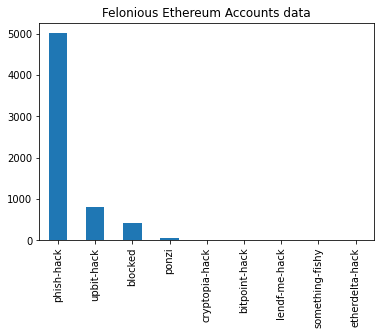

In [45]:
plt.title("Felonious Ethereum Accounts data")
df['label'].value_counts().plot(kind='bar')

### 3.1.2 Non-Felonious Accounts

In [46]:
df = pd.read_csv(valid_data_path)

print("Total number of felonious accounts in the dataset: ",df.shape[0])

df.head()

Total number of felonious accounts in the dataset:  8843


,Address
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8
1,0x0002b44ddb1476db43c868bd494422ee4c136fed
2,0x001f99982965a3792077893ecadc7be0c61d613c
3,0x0045eb75acf6e1cb1d9ec41e352a879e2cd50b35
4,0x00472c1e4275230354dbe5007a5976053f12610a


In [47]:
df = pd.read_csv(eoa_features_path_valid)

print("Total number of felonious accounts in the dataset: ",df.shape[0])

Total number of felonious accounts in the dataset:  2088


In [48]:
eoa_feat_valid = '../data/valid/features_valid/part-c-00000.csv'

with open(eoa_features_path_valid) as fin, open(eoa_feat_valid, 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))
        
df = pd.read_csv(eoa_feat_valid)
# adding header
headerList = [
    'address',
    'f1_total_transactions_sent',
    'f2_total_transactions_received',
    'f3_value_out',
    'f4_value_in',
    'f5_value_difference',
    'f6_number_of_distinct_address_contacted',
    'f7_total_transactions_sent_received',
    'f8_total_transactions_sent_to_unique_address',
    'f9_total_transactions_received_from_unique_address',
    'f10_first_transaction_time',
    'f11_last_transaction_time',
    'f12_transction_active_duration',
    'f13_last_txn_bit',
              'f14_last_transaction_value',
              'f15_average_incoming_ether',
              'f16_average_outgoing_ether',
              'f17_average_percentage_gas_incoming',
              'f18_average_percentage_gas_outgoing',
              'f19_outgoing_gas_price',
              'f20_incoming_gas_price',
              'f21_average_incoming_gas_price',
              'f22_average_outgoing_gas_price',
              'f23_total_failed_transactions_incoming',
              'f24_total_failed_transactions_outgoing',
              'f25_total_failed_transactions',
              'f26_total_success_transactions_incoming',
              'f27_total_success_transactions_outgoing',
              'f28_total_success_transactions',
              'f29_gas_used_incoming_transaction',
              'f30_gas_used_outgoing_transaction',
              'f31_percentage_transaction_sent',
              'f32_percentage_transaction_received',
              'f33_standard_deviation_ether_incoming',
              'f34_standard_deviation_ether_outgoing',
              'f35_standard_deviation_gas_price_incoming',
              'f36_standard_deviation_gas_price_outgoing',
              'f37_first_transaction_bit',
              'f38_first_transaction_value',
              'f39_mean_in_time',
              'f40_mean_out_time',
              'f41_mean_time',
              'f42_transaction_fee_spent_incoming',
              'f43_transaction_fee_spent_outgoing',
              'f44_transaction_fee_spent','class']
  
# converting data frame to csv
df.to_csv("eoa_feat_valid.csv", header=headerList, index=False)
  
# display modified csv file
df = pd.read_csv("eoa_feat_valid.csv")
df.head()
print("Total number of Valid EOA in the dataset: ",df.shape[0])

Total number of Valid EOA in the dataset:  2088


In [50]:
eoa_features_path_invalid = '../data/invalid/features_invalid/part-r-00000'

eoa_feat_invalid = '../data/invalid/features_invalid/part-c-00000.csv'

with open(eoa_features_path_invalid) as fin, open(eoa_feat_invalid, 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))
        
df1 = pd.read_csv(eoa_feat_invalid)
  
# converting data frame to csv
df1.to_csv("eoa_feat_invalid.csv", header=headerList, index=False)
  
# display modified csv file
df1 = pd.read_csv("eoa_feat_invalid.csv")

print("Total number of invalid EOA in the dataset: ",df1.shape[0])
df1.head()

Total number of invalid EOA in the dataset:  5122


,address,f1_total_transactions_sent,f2_total_transactions_received,f3_value_out,f4_value_in,f5_value_difference,f6_number_of_distinct_address_contacted,f7_total_transactions_sent_received,f8_total_transactions_sent_to_unique_address,f9_total_transactions_received_from_unique_address,...,f36_standard_deviation_gas_price_outgoing,f37_first_transaction_bit,f38_first_transaction_value,f39_mean_in_time,f40_mean_out_time,f41_mean_time,f42_transaction_fee_spent_incoming,f43_transaction_fee_spent_outgoing,f44_transaction_fee_spent,class
0,0x000000000000000000000000000000000000001e,0,1,0,9990000000000000000,9990000000000000000,1,1,0,1,...,0.000000e+00,0,9990000000000000000,0.000000,0.000000,0.000000,80000,0,80000,1
1,0x0000000000000000000000000000000000000fdc,0,1,0,7080000000000000,7080000000000000,1,1,0,1,...,0.000000e+00,0,7080000000000000,0.000000,0.000000,0.000000,21000,0,21000,1
2,0x000000000532b45f47779fce440748893b257865,3,20,117129473448396783579,117132024948396783579,2551500000000000,23,23,3,20,...,1.363964e+10,0,10000000000000000,2762.315789,187.500000,4018.045455,647000,63000,710000,1
3,0x00000000072d54638c2c2a3da3f715360269eea1,23,30,215965532670900878881,215193909626600024725,771623044300854156,44,53,17,28,...,5.911801e+10,0,208090008807822760222,9731.448276,7883.136364,5601.750000,816128,2111665,2927793,1
4,0x0000000009324b6434d7766af41908e4c49ee1d7,6,9,164209042700051608248,164214901700051608248,5859000000000000,12,15,3,9,...,2.309416e+10,0,5007000000000000000,5500.250000,13080.000000,4951.214286,198000,126000,324000,1


In [51]:
df_cd = pd.merge(df, df1, how='outer')
df_cd

,address,f1_total_transactions_sent,f2_total_transactions_received,f3_value_out,f4_value_in,f5_value_difference,f6_number_of_distinct_address_contacted,f7_total_transactions_sent_received,f8_total_transactions_sent_to_unique_address,f9_total_transactions_received_from_unique_address,...,f36_standard_deviation_gas_price_outgoing,f37_first_transaction_bit,f38_first_transaction_value,f39_mean_in_time,f40_mean_out_time,f41_mean_time,f42_transaction_fee_spent_incoming,f43_transaction_fee_spent_outgoing,f44_transaction_fee_spent,class
0,0x0002b44ddb1476db43c868bd494422ee4c136fed,229,7,3214922525794464472,3111926746271008368,102995779523456104,42,236,39,6,...,1.418579e+10,0,2613268790000000000,2.505182e+07,5.849192e+05,5.730382e+05,459333,21481054,21898387,0
1,0x0012f247c9f980eea0a9ad06893bfd95c3145794,8,3,149077000000000000000,50100000000000000000,98977000000000000000,5,11,4,2,...,2.360005e+10,0,100000000000000000,3.002405e+05,1.479854e+05,1.834362e+05,205266,2715000,2920266,0
2,0x0016338abcb6bfa6d355adc207c5d2d42acb5e42,8,246,831799000000000000000,831803047714000000000,4047714000000000,7,254,3,4,...,4.268246e+09,0,9144644537000000000,8.782686e+04,2.893156e+06,9.153249e+04,196200000,168000,196368000,0
3,0x001866ae5b3de6caa5a51543fd9fb64f524f5478,2656,1177,46128193992720000000000,47235911241260834150079,1107717248540834150079,1997,3833,897,1104,...,1.174572e+10,0,74711997997851028000,1.185374e+05,2.524524e+04,3.688519e+04,25765104,136209878,161953982,0
4,0x001f99982965a3792077893ecadc7be0c61d613c,2,2,100998973781596769000,101000000000000000000,1026218403231000,4,4,2,2,...,1.226698e+10,0,44048882182069392381,1.330000e+02,1.965400e+04,4.433333e+01,42000,111000,153000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0xff72982d880dc180ce738ca2d40c4c849365a443,1,1,19999916000000000000,20000000000000000000,84000000000000,2,2,1,1,...,2.000000e+09,0,20000000000000000000,0.000000e+00,0.000000e+00,1.001770e+05,21000,21000,42000,1
7206,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,67,43,61785994932000000000,53070251570000000000,8715743362000000000,71,110,44,31,...,1.173421e+10,0,3159238240000000000,3.598522e+05,2.356608e+05,1.440010e+05,1490200,6244000,7734200,1
7207,0xffb19ea3dbb08615945c3e6f380fa77c1819ebe8,3,2,59072760000000000,79619500000000000,20546740000000000,3,5,2,1,...,1.522094e+11,0,32219500000000000,1.534000e+05,2.918406e+06,1.473914e+06,42000,144608,186608,1
7208,0xffcc89233015b37a136e95525905fb4fd1256777,3,1,300000000000000000000,300000000000000000000,0,2,4,1,1,...,2.465132e+10,0,300000000000000000000,0.000000e+00,1.092420e+05,7.391367e+04,21000,3600000,3621000,1


In [53]:
df = df_cd
df.drop(['address',], inplace=True, axis=1)
print(df.isnull().values.any())
nan_rows = df[df.isnull().T.any()]
nan_rows

True

In [55]:
df.describe()

,f1_total_transactions_sent,f2_total_transactions_received,f6_number_of_distinct_address_contacted,f7_total_transactions_sent_received,f8_total_transactions_sent_to_unique_address,f9_total_transactions_received_from_unique_address,f10_first_transaction_time,f11_last_transaction_time,f12_transction_active_duration,f13_last_txn_bit,...,f35_standard_deviation_gas_price_incoming,f36_standard_deviation_gas_price_outgoing,f37_first_transaction_bit,f39_mean_in_time,f40_mean_out_time,f41_mean_time,f42_transaction_fee_spent_incoming,f43_transaction_fee_spent_outgoing,f44_transaction_fee_spent,class
count,7210.000000,7210.000000,7210.000000,7210.000000,7210.000000,7210.000000,7.210000e+03,7.210000e+03,7.210000e+03,7210.000000,...,7.210000e+03,7.210000e+03,7210.000000,7.210000e+03,7.210000e+03,7.210000e+03,7.210000e+03,7.210000e+03,7.210000e+03,7210.000000
mean,198.658391,126.523717,122.005687,325.182108,61.364216,62.141331,1.538598e+09,1.551169e+09,1.257063e+07,0.877393,...,2.213855e+10,1.980866e+10,0.005825,7.193572e+05,1.239978e+06,9.324074e+05,7.686666e+06,3.244197e+07,4.015388e+07,0.710402
std,1191.944516,855.786714,767.203050,1600.659338,480.400994,507.558551,3.942917e+07,4.299207e+07,2.829654e+07,0.328009,...,4.338777e+10,4.029753e+10,0.076106,3.574388e+06,6.505116e+06,4.168185e+06,7.658357e+07,2.952406e+08,3.166108e+08,0.453607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.438950e+09,1.446266e+09,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100000e+04,0.000000
25%,1.000000,2.000000,3.000000,4.000000,1.000000,2.000000,1.497323e+09,1.514395e+09,1.948400e+04,1.000000,...,1.052378e+10,8.059867e+09,0.000000,1.900000e+01,0.000000e+00,2.332770e+03,4.200000e+04,2.100000e+04,1.260000e+05,0.000000
50%,3.000000,4.000000,6.000000,8.000000,2.000000,3.000000,1.528694e+09,1.540233e+09,6.862190e+05,1.000000,...,1.591444e+10,1.148626e+10,0.000000,8.169538e+03,2.505478e+03,4.568629e+04,1.302000e+05,1.040000e+05,2.845200e+05,1.000000
75%,10.000000,14.000000,17.000000,27.000000,5.000000,9.000000,1.575680e+09,1.583890e+09,8.621899e+06,1.000000,...,2.275748e+10,1.932759e+10,0.000000,1.536480e+05,2.819267e+05,3.689650e+05,6.420000e+05,3.756382e+05,1.437453e+06,1.000000
max,10000.000000,10000.000000,10000.000000,10099.000000,9960.000000,10000.000000,1.638223e+09,1.642067e+09,2.028733e+08,1.000000,...,2.345953e+12,2.037107e+12,1.000000,1.121441e+08,1.229295e+08,1.171386e+08,2.668042e+09,9.394540e+09,9.396237e+09,1.000000


In [ ]:
df.dropna(inplace=True)

## Smart Contract Features

In [59]:
sc_features_path_valid = '../data/valid/features_valid/part-r-00001'

sc_feat_valid = '../data/valid/features_valid/part-c-00001.csv'

with open(sc_features_path_valid) as fin, open(sc_feat_valid, 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))
        
df = pd.read_csv(sc_feat_valid)
# adding header
columnList = [
    'address',
    "f1_contract_creation_time",
    "f2_transaction_fee_spent_contract_creation",
    "f3_percentage_gas_used_contract_creation",
    "f4_gas_price_contract_creation",
    "f5_first_contract_invoke_time",
    "f6_last_contract_invoke_time",
    "f7_active_duration",
    "f8_total_invocations",
    "f9_total_unique_invocations",
    "f10_avg_gas_used_contract_invocations",
    "f11_total_gas_price_contract_invocations",
    "f12_avg_gas_price_contract_invocations",
    "f13_total_tx_fee_contract_invocations",
    "f14_avg_tx_fee_contract_invocations",
    "f15_total_ether_contract_invocations",
    "f16_average_ether_contract_invocations",
    "f17_total_gas_used_contract_invocations",
    "f18_avg_gas_used_contract_invocations",
    "class"]
  
# converting data frame to csv
df.to_csv("sc_feat_valid.csv", header=columnList, index=False)
  
# display modified csv file
df = pd.read_csv("sc_feat_valid.csv")
df.head()
print("Total number of Valid SC in the dataset: ",df.shape[0])

Total number of Valid SC in the dataset:  6070


In [60]:
sc_features_path_invalid = '../data/invalid/features_invalid/part-r-00001'

sc_feat_invalid = '../data/invalid/features_invalid/part-c-00001.csv'

with open(sc_features_path_invalid) as fin, open(sc_feat_invalid, 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))
        
df1 = pd.read_csv(sc_feat_invalid)
  
# converting data frame to csv
df1.to_csv("sc_feat_invalid.csv", header=columnList, index=False)
  
# display modified csv file
df1 = pd.read_csv("sc_feat_invalid.csv")

print("Total number of invalid SC in the dataset: ",df1.shape[0])
df1.head()

Total number of invalid SC in the dataset:  470


,address,f1_contract_creation_time,f2_transaction_fee_spent_contract_creation,f3_percentage_gas_used_contract_creation,f4_gas_price_contract_creation,f5_first_contract_invoke_time,f6_last_contract_invoke_time,f7_active_duration,f8_total_invocations,f9_total_unique_invocations,f10_avg_gas_used_contract_invocations,f11_total_gas_price_contract_invocations,f12_avg_gas_price_contract_invocations,f13_total_tx_fee_contract_invocations,f14_avg_tx_fee_contract_invocations,f15_total_ether_contract_invocations,f16_average_ether_contract_invocations,f17_total_gas_used_contract_invocations,f18_avg_gas_used_contract_invocations,class
0,0x003eb9c77b5b896fcc27adead606d23def34510e,1636173593,3266079,100.000000,72547219921,1636173593,1640401957,4228364,88,61,46096.0,10543273660407,1.198099e+11,5322900,60487.0,0,0,4056463,46096.0,1
1,0x00bbd61f1f46bb2882e59af47b69dd7b501d5317,1599895831,1436718,100.000000,77000000000,1599895831,1606645255,6749424,3,3,41178.0,196100000000,6.536667e+10,182216,60738.0,0,0,123534,41178.0,1
2,0x0128e4fccf5ef86b030b28f0a8a029a3c5397a94,1598245046,3905623,66.666675,63000000000,1598245046,1638516430,40271384,3159,1831,43217.0,538290501077085,1.703990e+11,198252748,62758.0,102643703810000000000,32492467176321620,136525623,43217.0,1
3,0x0135c9a7bff72aa26e1d105ff5000e454e4dde7a,1538679649,2002904,85.021748,41000000000,1538679649,1624903468,86223819,812,291,118913.0,17062958585000,2.101350e+10,215890531,265875.0,181517977659053835437,223544307461888959,96558052,118913.0,1
4,0x016913ead5672f01de2043874e5c1cac5df608de,1582089609,520521,100.000000,1000000000,1582089609,1634830631,52741022,648,304,40178.0,5142791470136,7.936407e+09,44709838,68996.0,0,0,26035362,40178.0,1


In [61]:
df_cd = pd.merge(df, df1, how='outer')
df_cd

,address,f1_contract_creation_time,f2_transaction_fee_spent_contract_creation,f3_percentage_gas_used_contract_creation,f4_gas_price_contract_creation,f5_first_contract_invoke_time,f6_last_contract_invoke_time,f7_active_duration,f8_total_invocations,f9_total_unique_invocations,f10_avg_gas_used_contract_invocations,f11_total_gas_price_contract_invocations,f12_avg_gas_price_contract_invocations,f13_total_tx_fee_contract_invocations,f14_avg_tx_fee_contract_invocations,f15_total_ether_contract_invocations,f16_average_ether_contract_invocations,f17_total_gas_used_contract_invocations,f18_avg_gas_used_contract_invocations,class
0,0x0000000a95cdc345c1f71e361ece941ab2149fbe,1635728204,3178800,100.0000,109005244127,1635728204,1640428473,4700269,20,21,53352.0,2508977189526,1.254489e+11,1603942,80197.0,1600000000000000000,80000000000000000,1067044,53352.0,0
1,0x0003ed19f80564745e84b4cc411a7b6be4f0cf31,1637812311,2242427,100.0000,117021837043,1637812311,1639898547,2086236,101,95,79909.0,12775162345034,1.264868e+11,9517463,94232.0,1888613390000000000,18699142475247524,8070862,79909.0,0
2,0x000bab4f6b5560d7942ac88cf0233b6028b5b465,1610716059,5508384,100.0000,85000000000,1610716059,1628590252,17874193,1793,915,209089.0,710445189065704,3.962327e+11,1375765866,767298.0,945306314519250361854,527220476586308065,374897418,209089.0,0
3,0x0012EdA08A762ff158E9B6401591DB80Ed875920,1638190945,1038037,100.0000,120000000000,1638190945,1638507016,316071,5,3,79185.0,694698051031,1.389396e+11,539476,107895.0,0,0,395928,79185.0,0
4,0x001b28141562bc2601694d27c3f5fda2c06c234c,1493694346,1000000,18.2055,40000000000,1493694346,1505628361,11934015,16,5,23839.0,390876604343,2.442979e+10,2499000,156187.0,12306659575886750800,769166223492921925,381426,23839.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6535,0xfb6e71e0800bccc0db8a9cf326fe3213ca1a0ea0,1529228634,500048,100.0000,1000000000,1529228634,1555110447,25881813,3,4,21966.0,12000000000,4.000000e+09,106968,35656.0,1001000000000000000,333666666666666666,65899,21966.0,1
6536,0xfd477bf560e59941796b398cea662b393298abc0,1519080147,1685693,100.0000,4000000000,1519080147,1519080147,0,0,1,0.0,0,0.000000e+00,0,0.0,0,0,0,0.0,1
6537,0xfe75aee72700ff0e0742c00d12acf2724827fa00,1607558032,1304042,100.0000,41000000000,1607558032,1607561101,3069,8,7,43465.0,323081431885,4.038518e+10,397484,49685.0,0,0,347723,43465.0,1
6538,0xff35866acb80ce4b169d1460cd48108955c1c445,1520437336,1338603,100.0000,2000000000,1520437336,1582740769,62303433,2,3,33343.0,26000000000,1.300000e+10,282000,141000.0,0,0,66686,33343.0,1


In [62]:
df = df_cd
df.drop(['address',], inplace=True, axis=1)
print(df.isnull().values.any())
nan_rows = df[df.isnull().T.any()]
nan_rows

False


,f1_contract_creation_time,f2_transaction_fee_spent_contract_creation,f3_percentage_gas_used_contract_creation,f4_gas_price_contract_creation,f5_first_contract_invoke_time,f6_last_contract_invoke_time,f7_active_duration,f8_total_invocations,f9_total_unique_invocations,f10_avg_gas_used_contract_invocations,f11_total_gas_price_contract_invocations,f12_avg_gas_price_contract_invocations,f13_total_tx_fee_contract_invocations,f14_avg_tx_fee_contract_invocations,f15_total_ether_contract_invocations,f16_average_ether_contract_invocations,f17_total_gas_used_contract_invocations,f18_avg_gas_used_contract_invocations,class


In [63]:
df.describe()

,f1_contract_creation_time,f2_transaction_fee_spent_contract_creation,f3_percentage_gas_used_contract_creation,f4_gas_price_contract_creation,f5_first_contract_invoke_time,f6_last_contract_invoke_time,f7_active_duration,f8_total_invocations,f9_total_unique_invocations,f10_avg_gas_used_contract_invocations,f11_total_gas_price_contract_invocations,f12_avg_gas_price_contract_invocations,f13_total_tx_fee_contract_invocations,f14_avg_tx_fee_contract_invocations,f17_total_gas_used_contract_invocations,f18_avg_gas_used_contract_invocations,class
count,6.540000e+03,6.540000e+03,6540.000000,6.540000e+03,6.540000e+03,6.540000e+03,6.540000e+03,6540.000000,6540.000000,6.540000e+03,6.540000e+03,6.540000e+03,6.540000e+03,6.540000e+03,6.540000e+03,6.540000e+03,6540.000000
mean,1.617289e+09,2.597368e+06,90.045588,1.026743e+11,1.617289e+09,1.622164e+09,4.875318e+06,529.743119,233.766361,1.305540e+05,5.102450e+13,9.268751e+10,1.018746e+08,2.456898e+05,5.697235e+07,1.305540e+05,0.071865
std,4.444202e+07,2.007311e+06,24.327942,5.005915e+10,4.444202e+07,4.053607e+07,1.196238e+07,1829.828796,859.703666,4.189014e+05,2.137960e+14,6.325522e+10,4.385124e+08,6.970177e+05,2.489314e+08,4.189014e+05,0.258285
min,1.441633e+09,6.706600e+04,1.090386,2.675370e+08,1.441633e+09,1.470174e+09,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.635150e+09,1.087064e+06,100.000000,7.565314e+10,1.635150e+09,1.635697e+09,3.341750e+03,3.000000,2.000000,3.769575e+04,2.193225e+11,2.589236e+10,2.997470e+05,6.233025e+04,1.717950e+05,3.769575e+04,0.000000
50%,1.636470e+09,2.005506e+06,100.000000,1.036059e+11,1.636470e+09,1.637612e+09,9.282795e+05,17.000000,7.000000,5.299050e+04,1.700854e+12,1.029404e+11,3.592240e+06,1.189435e+05,1.883990e+06,5.299050e+04,0.000000
75%,1.637675e+09,3.320466e+06,100.000000,1.320969e+11,1.637675e+09,1.640419e+09,4.822050e+06,106.000000,46.000000,1.326918e+05,9.738093e+12,1.349608e+11,1.671339e+07,2.405720e+05,7.956070e+06,1.326918e+05,0.000000
max,1.638785e+09,2.808272e+07,100.000000,5.010000e+11,1.638785e+09,1.642079e+09,1.747001e+08,9999.000000,8678.000000,1.753604e+07,4.678485e+15,7.803328e+11,9.399060e+09,1.912226e+07,6.523766e+09,1.753604e+07,1.000000


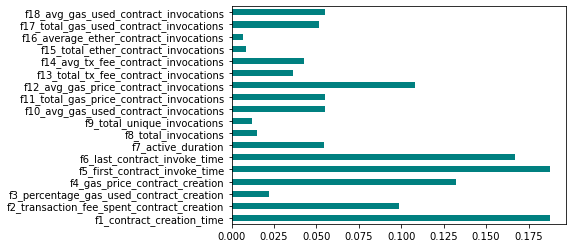

f5_first_contract_invoke_time 0.1879235057936024
f1_contract_creation_time 0.18772010299471897
f6_last_contract_invoke_time 0.16701738091628204
f4_gas_price_contract_creation 0.13231901034499383
f12_avg_gas_price_contract_invocations 0.10790302799105667
f2_transaction_fee_spent_contract_creation 0.09892682495508565
f11_total_gas_price_contract_invocations 0.05516754795777157
f18_avg_gas_used_contract_invocations 0.054893001431866706
f10_avg_gas_used_contract_invocations 0.05487119396997575
f7_active_duration 0.054298046334467776

The top 10 features for EOA DF are :
Index(['f5_first_contract_invoke_time', 'f1_contract_creation_time',
       'f6_last_contract_invoke_time', 'f4_gas_price_contract_creation',
       'f12_avg_gas_price_contract_invocations',
       'f2_transaction_fee_spent_contract_creation',
       'f11_total_gas_price_contract_invocations',
       'f18_avg_gas_used_contract_invocations',
       'f10_avg_gas_used_contract_invocations', 'f7_active_duration'],
      dtype='

In [64]:
# Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
# Also, let's segregate the data into separate variables so that the features and the labels are separated.

array = df.values

X = array[:,0:18]
Y = array[:,18]

Y = Y.astype('float64')

%matplotlib inline

importances = mutual_info_classif(X,Y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')

plt.show()

# Show the top 10 high scored features
threshold = 10  # the number of most relevant features
high_score_features = []

for score, f_name in sorted(zip(feat_importances, df.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
        
eoa_df_top_features = df[high_score_features]

print("\nThe top "+"% s" % threshold + " features for EOA DF are :")
print(eoa_df_top_features.columns)

## Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

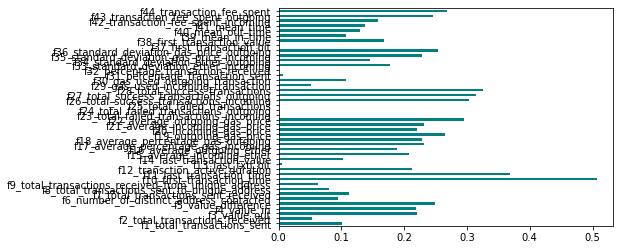

f10_first_transaction_time 0.5078283385578866
f11_last_transaction_time 0.36872961684075034
f28_total_success_transactions 0.325816487341799
f27_total_success_transactions_outgoing 0.3139936525481113
f26_total_success_transactions_incoming 0.3032141238475987
f22_average_outgoing_gas_price 0.29512060667295703
f44_transaction_fee_spent 0.26822114125810237
f19_outgoing_gas_price 0.2656623811267351
f36_standard_deviation_gas_price_outgoing 0.25381378757606665
f5_value_difference 0.24915312398616152

The top 10 features for EOA DF are :
Index(['f10_first_transaction_time', 'f11_last_transaction_time',
       'f28_total_success_transactions',
       'f27_total_success_transactions_outgoing',
       'f26_total_success_transactions_incoming',
       'f22_average_outgoing_gas_price', 'f44_transaction_fee_spent',
       'f19_outgoing_gas_price', 'f36_standard_deviation_gas_price_outgoing',
       'f5_value_difference'],
      dtype='object')


In [57]:
# Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
# Also, let's segregate the data into separate variables so that the features and the labels are separated.

array = df.values

X = array[:,0:44]
Y = array[:,44]

Y = Y.astype('float64')

%matplotlib inline

importances = mutual_info_classif(X,Y)
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')

plt.show()

# Show the top 10 high scored features
threshold = 10  # the number of most relevant features
high_score_features = []

for score, f_name in sorted(zip(feat_importances, df.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
        
eoa_df_top_features = df[high_score_features]

print("\nThe top "+"% s" % threshold + " features for EOA DF are :")
print(eoa_df_top_features.columns)

In [75]:
col  =  eoa_df_top_features.columns
cl = col.append(pd.Index(['class']))
cl

Index(['f5_first_contract_invoke_time', 'f1_contract_creation_time',
       'f6_last_contract_invoke_time', 'f4_gas_price_contract_creation',
       'f12_avg_gas_price_contract_invocations',
       'f2_transaction_fee_spent_contract_creation',
       'f11_total_gas_price_contract_invocations',
       'f18_avg_gas_used_contract_invocations',
       'f10_avg_gas_used_contract_invocations', 'f7_active_duration', 'class'],
      dtype='object')

In [76]:
evaluation_df = df[cl]

In [77]:
evaluation_df

,f5_first_contract_invoke_time,f1_contract_creation_time,f6_last_contract_invoke_time,f4_gas_price_contract_creation,f12_avg_gas_price_contract_invocations,f2_transaction_fee_spent_contract_creation,f11_total_gas_price_contract_invocations,f18_avg_gas_used_contract_invocations,f10_avg_gas_used_contract_invocations,f7_active_duration,class
0,1635728204,1635728204,1640428473,109005244127,1.254489e+11,3178800,2508977189526,53352.0,53352.0,4700269,0
1,1637812311,1637812311,1639898547,117021837043,1.264868e+11,2242427,12775162345034,79909.0,79909.0,2086236,0
2,1610716059,1610716059,1628590252,85000000000,3.962327e+11,5508384,710445189065704,209089.0,209089.0,17874193,0
3,1638190945,1638190945,1638507016,120000000000,1.389396e+11,1038037,694698051031,79185.0,79185.0,316071,0
4,1493694346,1493694346,1505628361,40000000000,2.442979e+10,1000000,390876604343,23839.0,23839.0,11934015,0
...,...,...,...,...,...,...,...,...,...,...,...
6535,1529228634,1529228634,1555110447,1000000000,4.000000e+09,500048,12000000000,21966.0,21966.0,25881813,1
6536,1519080147,1519080147,1519080147,4000000000,0.000000e+00,1685693,0,0.0,0.0,0,1
6537,1607558032,1607558032,1607561101,41000000000,4.038518e+10,1304042,323081431885,43465.0,43465.0,3069,1
6538,1520437336,1520437336,1582740769,2000000000,1.300000e+10,1338603,26000000000,33343.0,33343.0,62303433,1


# 4. Training

## 4.2 Data Splitting
We split the dataset into 70%-30% for the training and testing of our model.

In [81]:

array = evaluation_df.values

X = array[:,0:10]
y = array[:,10]

## 4.3 k-NN Classifier

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [92]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)

[[1201   14]
 [  23   70]]
0.9717125382262997


## 4.4 Decision Tree Classifier

In [105]:
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: encoding


In [106]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (5232, 10)
Testing split input-  (1308, 10)


In [107]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()

dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [108]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1211
         1.0       0.77      0.81      0.79        97

    accuracy                           0.97      1308
   macro avg       0.88      0.90      0.89      1308
weighted avg       0.97      0.97      0.97      1308



Text(0.5, 1.0, 'Accuracy Score: 0.9678899082568807')

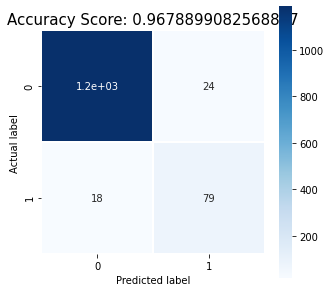

In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

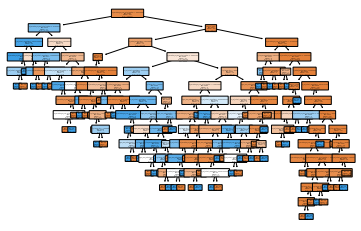

In [111]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Invalid", "Valid"] , filled = True , precision = 4, rounded = True)

## 4.5 Random Forest Classifier

## 4.6 XGBoost Classifier

# 5. Analysis/Evaluation

## 5.1 Experimental results for EOA analysis

## 5.2 Experimental results for Smart Contract analysis